Matplotlib is building the font cache; this may take a moment.


Calculando el resultado sin usar todos los cores...
Calculando el resultado usando todos los cores......

Tiempo_a_MANO : 1222.238 segundos o, 1222237.616 milisegundos
Tiempo_a_toda_MAQUINA : 797.005 segundos o, 797005.239 milisegundos
Diferencia entre tiempo a MANO y tiempo a toda MAQUINA : 425.232 segundos o, 425232.377 milisegundos
Relación entre tiempo a MANO y tiempo a toda MAQUINA: 1.534 %
Relación entre la computación tradicional ( a mano ) VS a la programación a toda máquina: 19.2


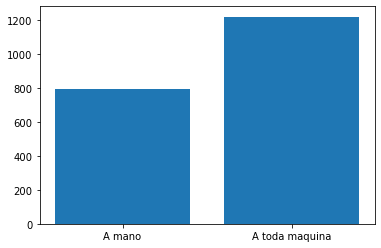

In [1]:
import concurrent.futures
import time
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt

def par_sum(inf, sup, pool=None):
    if not pool:
        with concurrent.futures.ThreadPoolExecutor() as capataz:
            trabajo_a_realizar = par_sum(inf, sup, pool=capataz)
            return sum(trabajo_completado.result() for trabajo_completado in concurrent.futures.as_completed(trabajo_a_realizar))
    else:
        if sup - inf <= 9_000_000:
            return [pool.submit(sum, range(inf, sup))]
        else:
            mitad = (sup + inf) // 2
            parte_izq = par_sum(inf, mitad, pool=pool)
            parte_der = par_sum(mitad, sup, pool=pool)
            return parte_izq + parte_der

'''def par_sum(inf, sup, pool=None):
    if not pool:
        with concurrent.futures.ThreadPoolExecutor() as capataz:
            trabajo_a_realizar = par_sum(inf, sup, pool=capataz)
            return sum(trabajo_completado.result() for trabajo_completado in concurrent.futures.as_completed(trabajo_a_realizar))
    elif sup - inf <= 100_00_000:
        return [pool.submit(sum, range(inf, sup))]
    else:
        mitad = (sup + inf) // 2
        parte_izq = par_sum(inf, mitad, pool=pool)
        parte_der = par_sum(mitad, sup, pool=pool)
        return parte_izq + parte_der'''

def mano_sum(inf, sup):
    return sum(range(inf, sup))

if __name__ == '__main__':
    limite_superior = 90_00_000_000
    numero_de_ejecuciones = 1


    print('Calculando el resultado sin usar todos los cores...')
    tiempo_a_mano = 0
    for i in range(numero_de_ejecuciones):
        inicio = time.perf_counter()
        mano_sum(1, limite_superior)
        tiempo_a_mano += time.perf_counter() - inicio
    tiempo_a_mano /= numero_de_ejecuciones

    print('Calculando el resultado usando todos los cores......')
    tiempo_a_toda_maquina = 0
    for i in range(numero_de_ejecuciones):
        inicio = time.perf_counter()
        par_sum(1, limite_superior)
        tiempo_a_toda_maquina += time.perf_counter() - inicio
    tiempo_a_toda_maquina /= numero_de_ejecuciones

    print('\nTiempo_a_MANO :',round(tiempo_a_mano,3), 'segundos o,',round(tiempo_a_mano*1000,3),'milisegundos')
    print('Tiempo_a_toda_MAQUINA :', round(tiempo_a_toda_maquina,3), 'segundos o,',round(tiempo_a_toda_maquina*1000,3),'milisegundos')
    print('Diferencia entre tiempo a MANO y tiempo a toda MAQUINA :',round(tiempo_a_mano - tiempo_a_toda_maquina,3), 'segundos o,',round((tiempo_a_mano - tiempo_a_toda_maquina)*1000,3),'milisegundos')
    print('Relación entre tiempo a MANO y tiempo a toda MAQUINA:',round(tiempo_a_mano / tiempo_a_toda_maquina,3),'%')
    print('Relación entre la computación tradicional ( a mano ) VS a la programación a toda máquina:', round((tiempo_a_mano / tiempo_a_toda_maquina) / mp.cpu_count(),3)*100)

    height = [tiempo_a_mano, tiempo_a_toda_maquina]
    bars = ('A mano', 'A toda maquina')
    x_pos = np.arange(len(bars))
    plt.bar(x_pos, height)
    plt.xticks(x_pos, bars)
    plt.show()